In [1]:
#import basic library
import pandas as pd
import numpy as np

# 1. Data Exploration

In [2]:
#load the data
Customer_raw=pd.read_csv('marketing_campaign.csv',sep = '\t')

In [3]:
Customer_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
Customer_raw.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
Customer_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# 2. Data pre-processing

Pre-process the customer features that we use to build the clustering model, including:

Year_Birth, Income, Education, Marital_Status, Kidhome, Teenhome, Recency, Dt_Customer


In [6]:
# drop duplicates if any
Customer_raw.drop_duplicates()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
#delete the row with missing value
Customer=Customer_raw.dropna()
Customer= Customer.reset_index(drop=True)
Customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

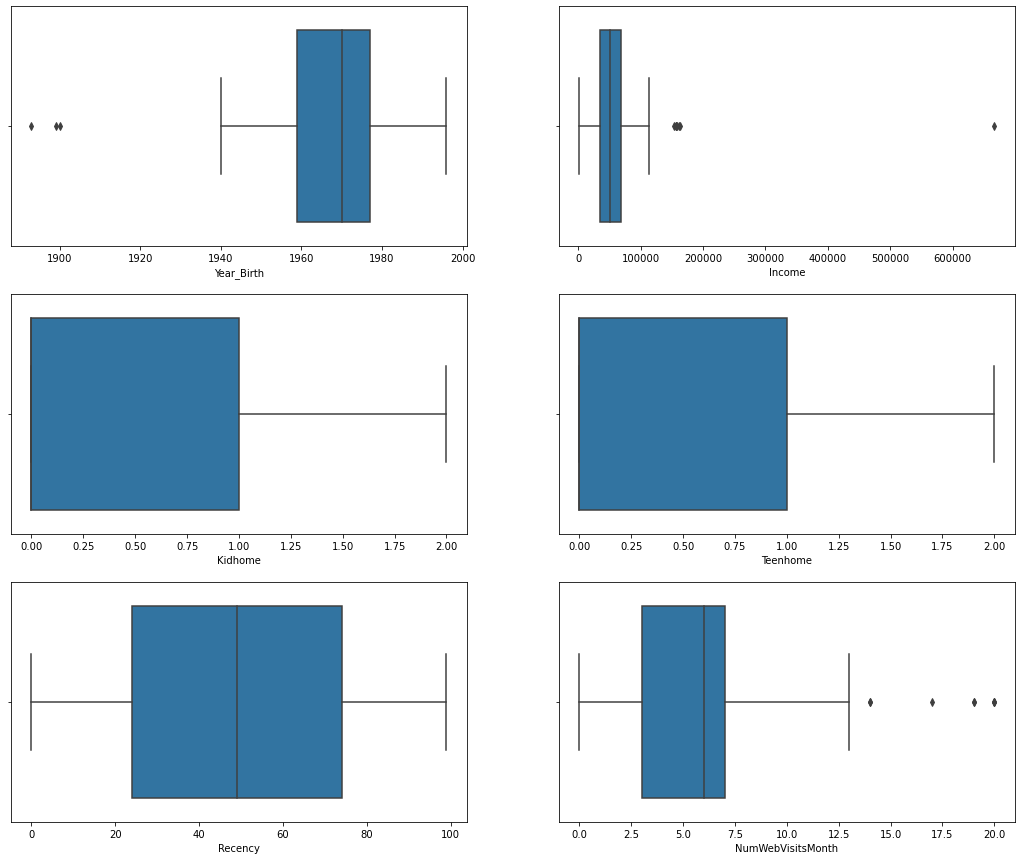

In [9]:
# Detect outliers of numerical features using boxplots

import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(3,2, figsize=(18, 15))

sns.boxplot(x = Customer['Year_Birth'], ax = axes[0,0])
sns.boxplot(x = Customer['Income'], ax = axes[0,1])
sns.boxplot(x = Customer['Kidhome'], ax = axes[1,0])
sns.boxplot(x = Customer['Teenhome'], ax = axes[1,1])
sns.boxplot(x = Customer['Recency'], ax = axes[2,0])
sns.boxplot(x = Customer['NumWebVisitsMonth'], ax = axes[2,1])

plt.show()

In [10]:
# Remove outliers in all numerical columns

for col in Customer.columns:
    if Customer[col].dtype == 'int64' or Customer[col].dtype == 'float64':
            percentiles = Customer[col].quantile([0.01,0.99]).values
            Customer[col][Customer[col] <= percentiles[0]] = percentiles[0]
            Customer[col][Customer[col] >= percentiles[1]] = percentiles[1]
    else:
            Customer[col]=Customer[col]

/var/folders/1t/rv1fb44x2799r0pq1z286md40000gn/T/ipykernel_68307/3941412997.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer[col][Customer[col] <= percentiles[0]] = percentiles[0]
/var/folders/1t/rv1fb44x2799r0pq1z286md40000gn/T/ipykernel_68307/3941412997.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer[col][Customer[col] >= percentiles[1]] = percentiles[1]


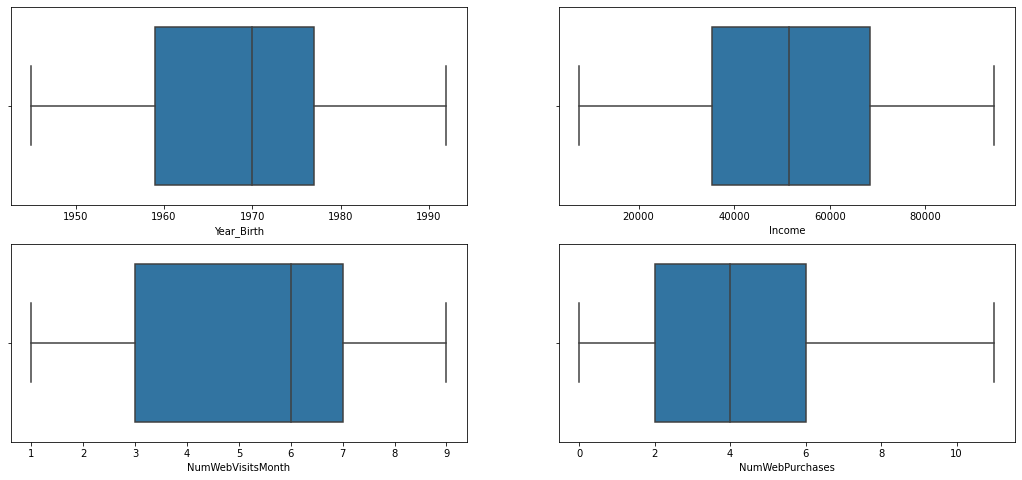

In [11]:
# Boxplots of some features after removing outliers 

f, axes = plt.subplots(2,2, figsize=(18, 8))

sns.boxplot(x = Customer['Year_Birth'], ax = axes[0,0])
sns.boxplot(x = Customer['Income'], ax = axes[0,1])
sns.boxplot(x = Customer['NumWebVisitsMonth'], ax = axes[1,0])
sns.boxplot(x = Customer['NumWebPurchases'], ax = axes[1,1])


plt.show()

In [12]:
Customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.0,2216.000000
mean,5588.506069,1968.882220,51770.277076,0.441787,0.505415,49.004964,304.054603,26.210740,165.410244,37.466652,...,5.288357,0.073556,0.074007,0.073105,0.064079,0.013538,0.0,3.0,11.0,0.150271
std,3247.172553,11.665973,20728.704775,0.536896,0.544181,28.935227,334.022458,39.223079,216.528310,54.121252,...,2.294437,0.261106,0.261842,0.260367,0.244950,0.115588,0.0,0.0,0.0,0.357417
min,123.300000,1945.000000,7579.200000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0,11.0,0.000000
max,11074.850000,1992.000000,94458.800000,2.000000,2.000000,98.000000,1285.000000,172.000000,914.700000,226.700000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,3.0,11.0,1.000000


In [13]:
# Transformation of data & Label Encoding of categorical variables

Customer['age']=2022-Customer['Year_Birth']
Customer['children']=Customer['Kidhome']+Customer['Teenhome']

# Education: 0 to 4, form Bachlor to Phd 
Customer["Education"]=Customer["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4})

# Martial_Status: Single -> 0; Have partners -> 1 
Customer["Marital_Status"]=Customer["Marital_Status"].replace({"Married":1, "Together":1, "Absurd":0,"Alone":0,"Widow":0, "YOLO":0, "Divorced":0, "Single":0,})
Customer["Loyalty"] = 2022 - Customer["Dt_Customer"].str.slice(6,10,1).astype("int16")


In [14]:
Customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,children,Loyalty
0,5524.0,1957,2,0,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,65,0,10
1,2174.0,1954,2,0,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,68,2,8
2,4141.0,1965,2,1,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,57,0,9
3,6182.0,1984,2,1,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,38,1,8
4,5324.0,1981,4,1,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,41,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870.0,1967,2,1,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,55,1,9
2212,4001.0,1946,4,1,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,76,3,8
2213,7270.0,1981,2,0,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,41,0,8
2214,8235.0,1956,3,1,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,66,1,8


In [15]:
# Z-score standardization
Customer['Income_after']=(Customer['Income']-Customer['Income'].mean())/Customer['Income'].std()
Customer['Education_after']=(Customer['Education']-Customer['Education'].mean())/Customer['Education'].std()
Customer['Marital_Status_after']=(Customer['Marital_Status']-Customer['Marital_Status'].mean())/Customer['Marital_Status'].std()
Customer['age_after']=(Customer['age']-Customer['age'].mean())/Customer['age'].std()
Customer['children_after']=(Customer['children']-Customer['children'].mean())/Customer['children'].std()
Customer['Loyalty_after']=(Customer['Loyalty']-Customer['Loyalty'].mean())/Customer['Loyalty'].std()

In [16]:
#drop the useless columns
Customer = Customer.drop(columns = ['Year_Birth',
                                    'Dt_Customer',
                                    'Recency', 
                                    'Kidhome',
                                    'Teenhome',
                                    'Income',
                                    'Education',
                                    'Marital_Status',
                                    'age',
                                    'children',
                                    'Loyalty']
                        )

In [17]:
Customer

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Complain,Z_CostContact,Z_Revenue,Response,Income_after,Education_after,Marital_Status_after,age_after,children_after,Loyalty_after
0,5524.0,635,88,546.0,172.0,88,88,3.0,8,10.0,...,0,3,11,1,0.307193,-0.457630,-1.348524,1.018537,-1.264518,1.500004
1,2174.0,11,1,6.0,2.0,1,6,2.0,1,1.0,...,0,3,11,0,-0.261776,-0.457630,-1.348524,1.275695,1.405488,-1.417073
2,4141.0,426,49,127.0,111.0,21,42,1.0,8,2.0,...,0,3,11,0,0.957258,-0.457630,0.741217,0.332782,-1.264518,0.041466
3,6182.0,11,4,20.0,10.0,3,5,2.0,2,0.0,...,0,3,11,0,-1.212052,-0.457630,0.741217,-1.295887,0.070485,-1.417073
4,5324.0,173,43,118.0,46.0,27,15,5.0,5,3.0,...,0,3,11,0,0.314671,1.532767,0.741217,-1.038729,0.070485,-1.417073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870.0,709,43,182.0,42.0,118,227,2.0,9,3.0,...,0,3,11,0,0.456021,-0.457630,0.741217,0.161343,0.070485,0.041466
2212,4001.0,406,0,30.0,0.0,0,8,7.0,8,2.0,...,0,3,11,0,0.590665,1.532767,0.741217,1.961450,2.740492,-1.417073
2213,7270.0,908,48,217.0,32.0,12,24,1.0,2,3.0,...,0,3,11,0,0.251377,-0.457630,-1.348524,-1.038729,-1.264518,-1.417073
2214,8235.0,428,30,214.0,80.0,30,61,2.0,6,5.0,...,0,3,11,0,0.843020,0.537569,0.741217,1.104256,0.070485,-1.417073


In [18]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2216 non-null   float64
 1   MntWines              2216 non-null   int64  
 2   MntFruits             2216 non-null   int64  
 3   MntMeatProducts       2216 non-null   float64
 4   MntFishProducts       2216 non-null   float64
 5   MntSweetProducts      2216 non-null   int64  
 6   MntGoldProds          2216 non-null   int64  
 7   NumDealsPurchases     2216 non-null   float64
 8   NumWebPurchases       2216 non-null   int64  
 9   NumCatalogPurchases   2216 non-null   float64
 10  NumStorePurchases     2216 non-null   int64  
 11  NumWebVisitsMonth     2216 non-null   int64  
 12  AcceptedCmp3          2216 non-null   int64  
 13  AcceptedCmp4          2216 non-null   int64  
 14  AcceptedCmp5          2216 non-null   int64  
 15  AcceptedCmp1         

#### Create new attributes finding the most purchased items and sites of purchase

In [19]:
Maxpurchase=[]
for i in range(len(Customer)):
    x1=float(Customer.loc[i]['MntWines'])
    x2=float(Customer.loc[i]['MntFruits'])
    x3=float(Customer.loc[i]['MntMeatProducts'])
    x4=float(Customer.loc[i]['MntFishProducts'])
    x5=float(Customer.loc[i]['MntSweetProducts'])
    x6=float(Customer.loc[i]['MntGoldProds'])
    maxpurchase=max(x1,x2,x3,x4,x5,x6)
    if Customer.loc[i]['MntWines']==maxpurchase:
        Maxpurchase.append('Wines')
    elif Customer.loc[i]['MntFruits']==maxpurchase:
        Maxpurchase.append('Fruits')
    elif Customer.loc[i]['MntMeatProducts']==maxpurchase:
        Maxpurchase.append('Meat')
    elif Customer.loc[i]['MntFishProducts']==maxpurchase:
        Maxpurchase.append('Fish')
    elif Customer.loc[i]['MntSweetProducts']==maxpurchase:
        Maxpurchase.append('Sweet')
    else:
        Maxpurchase.append('Gold')

In [20]:
Maxpurchase_array=np.array(Maxpurchase)
Maxpurchase_after=pd.DataFrame(Maxpurchase_array)
Customer['Maxpurchase']=Maxpurchase_after

In [21]:
Customer

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Z_CostContact,Z_Revenue,Response,Income_after,Education_after,Marital_Status_after,age_after,children_after,Loyalty_after,Maxpurchase
0,5524.0,635,88,546.0,172.0,88,88,3.0,8,10.0,...,3,11,1,0.307193,-0.457630,-1.348524,1.018537,-1.264518,1.500004,Wines
1,2174.0,11,1,6.0,2.0,1,6,2.0,1,1.0,...,3,11,0,-0.261776,-0.457630,-1.348524,1.275695,1.405488,-1.417073,Wines
2,4141.0,426,49,127.0,111.0,21,42,1.0,8,2.0,...,3,11,0,0.957258,-0.457630,0.741217,0.332782,-1.264518,0.041466,Wines
3,6182.0,11,4,20.0,10.0,3,5,2.0,2,0.0,...,3,11,0,-1.212052,-0.457630,0.741217,-1.295887,0.070485,-1.417073,Meat
4,5324.0,173,43,118.0,46.0,27,15,5.0,5,3.0,...,3,11,0,0.314671,1.532767,0.741217,-1.038729,0.070485,-1.417073,Wines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870.0,709,43,182.0,42.0,118,227,2.0,9,3.0,...,3,11,0,0.456021,-0.457630,0.741217,0.161343,0.070485,0.041466,Wines
2212,4001.0,406,0,30.0,0.0,0,8,7.0,8,2.0,...,3,11,0,0.590665,1.532767,0.741217,1.961450,2.740492,-1.417073,Wines
2213,7270.0,908,48,217.0,32.0,12,24,1.0,2,3.0,...,3,11,0,0.251377,-0.457630,-1.348524,-1.038729,-1.264518,-1.417073,Wines
2214,8235.0,428,30,214.0,80.0,30,61,2.0,6,5.0,...,3,11,0,0.843020,0.537569,0.741217,1.104256,0.070485,-1.417073,Wines


In [22]:
Site=[]
for i in range(len(Customer)):
    x1=float(Customer.loc[i]['NumWebPurchases'])
    x2=float(Customer.loc[i]['NumCatalogPurchases'])
    x3=float(Customer.loc[i]['NumStorePurchases'])
    maxpurchase=max(x1,x2,x3)
    if Customer.loc[i]['NumWebPurchases']==maxpurchase:
        Site.append('Web')
    elif Customer.loc[i]['NumCatalogPurchases']==maxpurchase:
        Site.append('Catalog')
    else:
        Site.append('Store')

In [23]:
Site_array=np.array(Site)
Site_after=pd.DataFrame(Site_array)
Customer['Maxsite']=Site_after

In [24]:
Customer['Maxpurchase'].value_counts()

Wines     1521
Meat       438
Gold       167
Fish        59
Sweet       16
Fruits      15
Name: Maxpurchase, dtype: int64

In [25]:
Customer['Maxsite'].value_counts()

Store      1473
Web         587
Catalog     156
Name: Maxsite, dtype: int64

<AxesSubplot:>

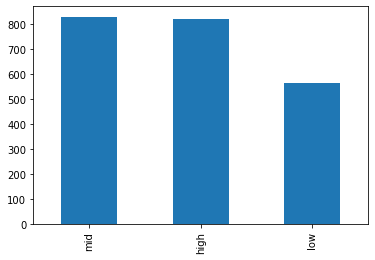

In [26]:
# New attribute using discritization

group_names = ['low','mid','high']
Customer['NumWebVisitsMonth_after']=pd.cut(Customer['NumWebVisitsMonth'], 3 , labels=group_names)
Customer['NumWebVisitsMonth_after'].value_counts().plot(kind='bar')

In [27]:
Customer

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Response,Income_after,Education_after,Marital_Status_after,age_after,children_after,Loyalty_after,Maxpurchase,Maxsite,NumWebVisitsMonth_after
0,5524.0,635,88,546.0,172.0,88,88,3.0,8,10.0,...,1,0.307193,-0.457630,-1.348524,1.018537,-1.264518,1.500004,Wines,Catalog,high
1,2174.0,11,1,6.0,2.0,1,6,2.0,1,1.0,...,0,-0.261776,-0.457630,-1.348524,1.275695,1.405488,-1.417073,Wines,Store,mid
2,4141.0,426,49,127.0,111.0,21,42,1.0,8,2.0,...,0,0.957258,-0.457630,0.741217,0.332782,-1.264518,0.041466,Wines,Store,mid
3,6182.0,11,4,20.0,10.0,3,5,2.0,2,0.0,...,0,-1.212052,-0.457630,0.741217,-1.295887,0.070485,-1.417073,Meat,Store,mid
4,5324.0,173,43,118.0,46.0,27,15,5.0,5,3.0,...,0,0.314671,1.532767,0.741217,-1.038729,0.070485,-1.417073,Wines,Store,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870.0,709,43,182.0,42.0,118,227,2.0,9,3.0,...,0,0.456021,-0.457630,0.741217,0.161343,0.070485,0.041466,Wines,Web,mid
2212,4001.0,406,0,30.0,0.0,0,8,7.0,8,2.0,...,0,0.590665,1.532767,0.741217,1.961450,2.740492,-1.417073,Wines,Web,high
2213,7270.0,908,48,217.0,32.0,12,24,1.0,2,3.0,...,0,0.251377,-0.457630,-1.348524,-1.038729,-1.264518,-1.417073,Wines,Store,mid
2214,8235.0,428,30,214.0,80.0,30,61,2.0,6,5.0,...,0,0.843020,0.537569,0.741217,1.104256,0.070485,-1.417073,Wines,Store,low


# 3. Model Building - K Means Clustering

### Model Building: We will try different model settings using different hyperparameters and different features.

### Model Evaluation: We will mainly rely on qualitative methods to evaluate the models, such as finding the best clustering with the clearest patterns, and visualizing the clusters.

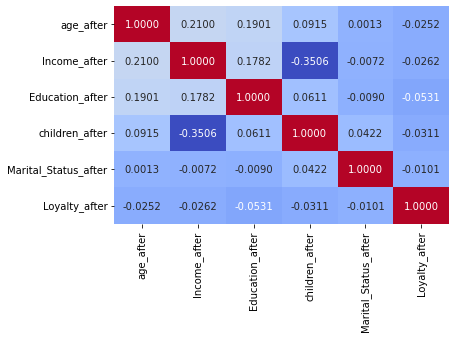

In [28]:
# Features selection - Correlation Matrix

df = pd.DataFrame(Customer,columns=['age_after','Income_after','Education_after', 'children_after', 'Marital_Status_after', 'Loyalty_after'])

corr = df.corr()

htmap = sns.heatmap(df.corr(), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False)

Notes: According to the correlation maxtrix, they show only weak correlation while most of them show no coorelation. We will firsty use all people features, then drop some features with weak correlation.

However, we might add back the dropped features later to test more settings because it is not a valid reason to drop based on a correlation that is not strong, which would result in loss of information.

## 3.1. Model Setting 1

K = 4

Features = Age, Income, children, Loyalty, Education, Marital_Status

Features selection: First try using all features of customer characteristics

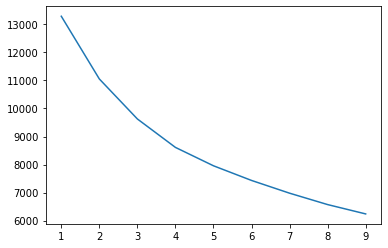

In [29]:
#using "ELBOW" method to find the best k for the three attributes clustering

k_data_list = [] # list for saving the data about K
ssd_data_list = [] # list for saving the data about SSD
features_all=['children_after','age_after','Income_after','Loyalty_after', 'Education_after', 'Marital_Status_after']
X_all = Customer [features_all]
from sklearn.cluster import KMeans
for k in range(1,10):
    tmp_k_cluster_model = KMeans(n_clusters=k, random_state=42)
    # fit data
    tmp_k_cluster_model.fit(X_all)
    
    #Sum of squared distances of samples to their closest cluster center
    SSD = tmp_k_cluster_model.inertia_
    k_data_list.append(k)
    ssd_data_list.append(SSD)
    
# import the library for plotting figures
import matplotlib.pyplot as plt
# plot SSD and K
plt.plot(k_data_list,ssd_data_list)

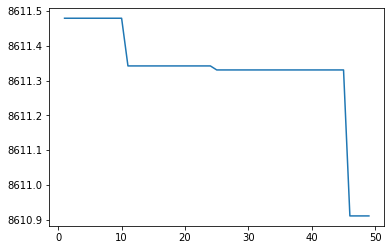

In [30]:
# find the best n_init for the three attributes clustering

n_init_data_list = [] # list for saving the data about n_init
ssd_data_list = [] # list for saving the data about SSD
features_all=['children_after','age_after','Income_after','Loyalty_after', 'Education_after', 'Marital_Status_after']
X_all = Customer[features_all]
from sklearn.cluster import KMeans
for i in range(1,50):
    tmp_n_init_model = KMeans(n_clusters=4, random_state=42, n_init=i)
    # fit data
    tmp_n_init_model.fit(X_all)
    
    #Sum of squared distances of samples to their closest cluster center
    SSD = tmp_n_init_model.inertia_
    n_init_data_list.append(i)
    ssd_data_list.append(SSD)
    
# import the library for plotting figures
import matplotlib.pyplot as plt
# plot SSD and K
plt.plot(n_init_data_list,ssd_data_list)

Notes: We keep our models with its default value n_init = 10, because it is already high enough for our model to keep the ssd low, as shown in the plot above.

In [31]:
# Build model using k = 4

from sklearn.cluster import KMeans
k=4
kmeansmodel = KMeans(n_clusters=k, random_state=42)

X_all = Customer[features_all]
kmeansmodel.fit(X_all)

clusters= kmeansmodel.predict(X_all)
X_all['clusters']=clusters+1

/var/folders/1t/rv1fb44x2799r0pq1z286md40000gn/T/ipykernel_68307/2072049330.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['clusters']=clusters+1


### Model Evaluation - Setting 1

In [32]:
# SSD
SSD = kmeansmodel.inertia_
print(f'SSD: {SSD}.')

SSD: 8611.479382184261.


In [33]:
# Patterns of amount spent on products 

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxpurchase'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
Check

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Wines     414
Meat       91
Gold       48
Fish       12
Fruits      3
Sweet       2
Name: Maxpurchase, dtype: int64
for cluster 2
Wines    567
Meat      45
Gold      10
Sweet      4
Fish       3
Name: Maxpurchase, dtype: int64
for cluster 3
Wines     338
Meat      191
Fish        3
Fruits      2
Gold        1
Sweet       1
Name: Maxpurchase, dtype: int64
for cluster 4
Wines     202
Meat      111
Gold      108
Fish       41
Fruits     10
Sweet       9
Name: Maxpurchase, dtype: int64


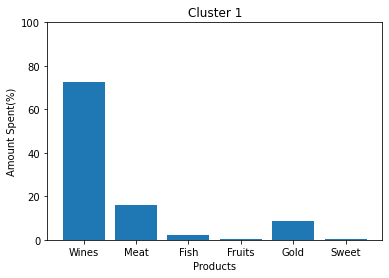

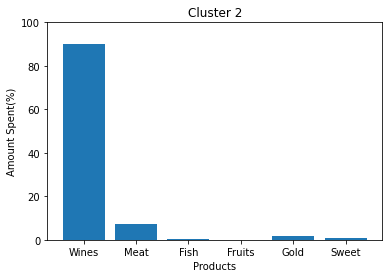

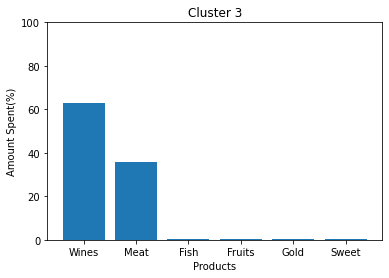

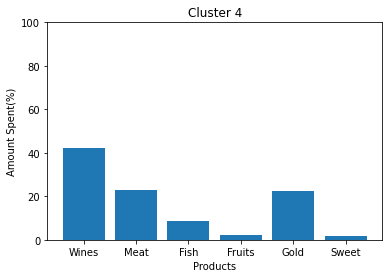

In [34]:
# Visualization of Product Pattern

xaxis = ['Wines', 'Meat', 'Fish', 'Fruits', 'Gold', 'Sweet']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for prod in xaxis:
        if prod in x['Maxpurchase'].unique(): 
            yaxis.append(x['Maxpurchase'].value_counts()[prod]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Products')
    plt.ylabel('Amount Spent(%)')
    plt.show()
    

In [35]:
# Patterns on number of purchases made through different sites

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxsite'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1



for cluster 1
Store      362
Web        181
Catalog     27
Name: Maxsite, dtype: int64
for cluster 2
Store      419
Web        195
Catalog     15
Name: Maxsite, dtype: int64
for cluster 3
Store      360
Catalog    109
Web         67
Name: Maxsite, dtype: int64
for cluster 4
Store      332
Web        144
Catalog      5
Name: Maxsite, dtype: int64


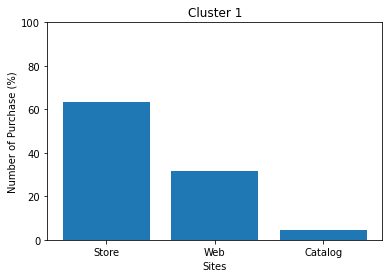

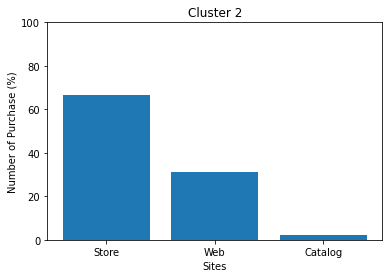

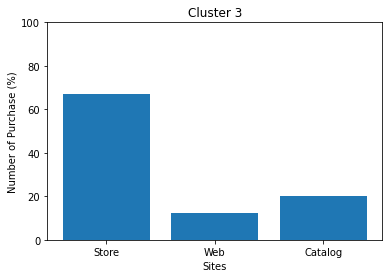

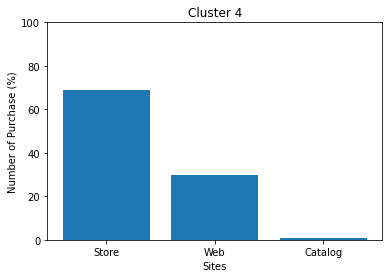

In [36]:
# Visualization of Site Purchase Pattern

xaxis = ['Store', 'Web', 'Catalog']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for site in xaxis:
        if site in x['Maxsite'].unique(): 
            yaxis.append(x['Maxsite'].value_counts()[site]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Sites')
    plt.ylabel('Number of Purchase (%)')
    plt.show()
    

In [37]:
# Patterns on Web Visits

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['NumWebVisitsMonth_after'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
high    259
mid     253
low      58
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 2
mid     301
high    250
low      78
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 3
low     406
mid     111
high     19
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 4
high    293
mid     166
low      22
Name: NumWebVisitsMonth_after, dtype: int64


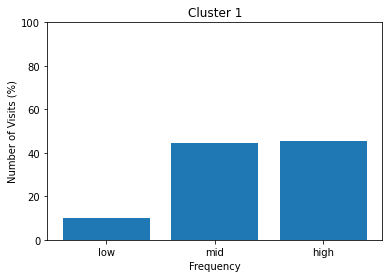

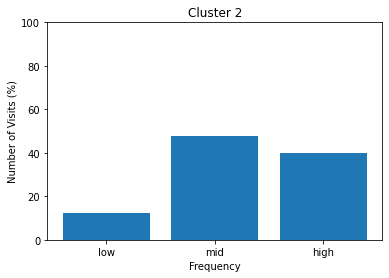

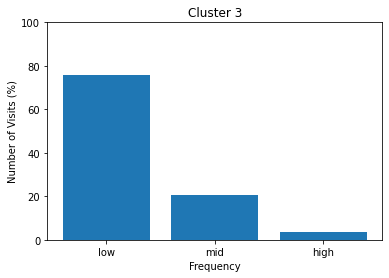

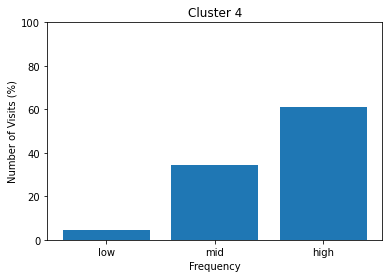

In [38]:
# Visualization of Web Visits Pattern

xaxis = ['low', 'mid', 'high']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for num in xaxis:
        if num in x['NumWebVisitsMonth_after'].unique(): 
            yaxis.append(x['NumWebVisitsMonth_after'].value_counts()[num]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Frequency')
    plt.ylabel('Number of Visits (%)')
    plt.show()
    

### Cluster Charactersitics - Setting 1

<AxesSubplot:xlabel='age_after', ylabel='Income_after'>

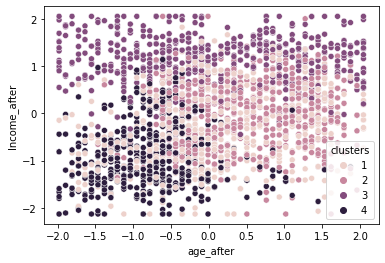

In [39]:
sns.scatterplot(x="age_after", y="Income_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='Education_after', ylabel='Income_after'>

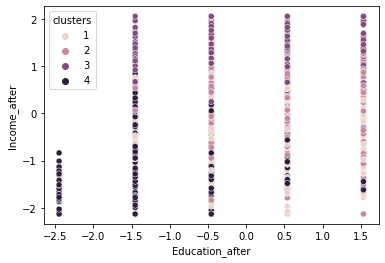

In [40]:
sns.scatterplot(x="Education_after", y="Income_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='Marital_Status_after', ylabel='Income_after'>

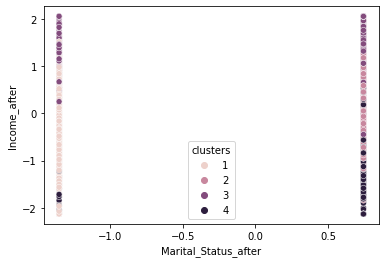

In [41]:
sns.scatterplot(x="Marital_Status_after", y="Income_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='children_after', ylabel='Income_after'>

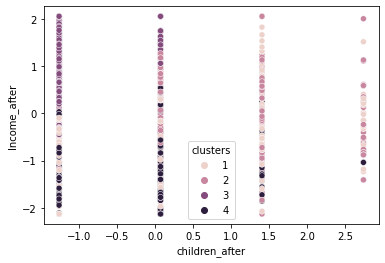

In [42]:
sns.scatterplot(x="children_after", y="Income_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='Loyalty_after', ylabel='Income_after'>

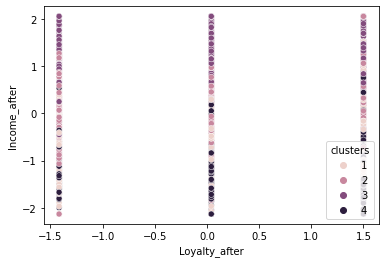

In [43]:
sns.scatterplot(x="Loyalty_after", y="Income_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='Loyalty_after', ylabel='age_after'>

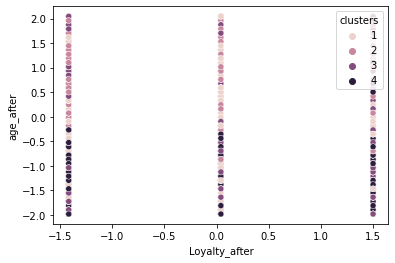

In [44]:
sns.scatterplot(x="Loyalty_after", y="age_after", data=X_all, hue="clusters")

## 3.2. Model Setting 2

k = 4

Features = Income, age, education, marital_status, children

We drop the feature Loyalty, because the data for loyalty is based on number of days since last purchase, which is difficult to accurately represent loyalty. A better data would be the frequency of purchase during a time period, but this is not provided. 

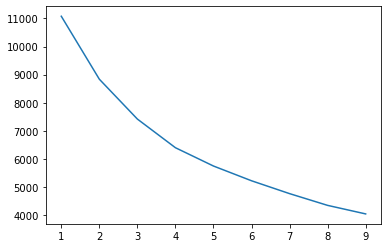

In [123]:
#using "ELBOW" method to find the best k for the three attributes clustering
k_data_list = [] # list for saving the data about K
ssd_data_list = [] # list for saving the data about SSD
features_all=['Income_after', 'Education_after','Marital_Status_after', 'age_after','children_after']
X_all = Customer [features_all]
from sklearn.cluster import KMeans
for k in range(1,10):
    tmp_k_cluster_model = KMeans(n_clusters=k, random_state=42)
    # fit data
    tmp_k_cluster_model.fit(X_all)
    #Sum of squared distances of samples to their closest cluster center
    SSD = tmp_k_cluster_model.inertia_
    k_data_list.append(k)
    ssd_data_list.append(SSD)
# import the library for plotting figures
import matplotlib.pyplot as plt
# plot SSD and K
plt.plot(k_data_list,ssd_data_list)

In [124]:
# Build model using k = 4

from sklearn.cluster import KMeans
k=4
kmeansmodel = KMeans(n_clusters=k, random_state=42)

X_all = Customer[features_all]
kmeansmodel.fit(X_all)

clusters= kmeansmodel.predict(X_all)
X_all['clusters']=clusters+1

/var/folders/1t/rv1fb44x2799r0pq1z286md40000gn/T/ipykernel_68307/2072049330.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['clusters']=clusters+1


### Model Evaluation - Setting 2

In [125]:
# SSD
SSD = kmeansmodel.inertia_
print(f'SSD: {SSD}.')

SSD: 6404.036377309814.


In [48]:
# Patterns of amount spent on products 

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxpurchase'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
Check

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Wines     174
Meat      118
Gold      113
Fish       44
Fruits     10
Sweet       9
Name: Maxpurchase, dtype: int64
for cluster 2
Wines    595
Meat      48
Gold      12
Sweet      4
Fish       3
Name: Maxpurchase, dtype: int64
for cluster 3
Wines     347
Meat      190
Fish        3
Fruits      2
Gold        1
Sweet       1
Name: Maxpurchase, dtype: int64
for cluster 4
Wines     405
Meat       82
Gold       41
Fish        9
Fruits      3
Sweet       2
Name: Maxpurchase, dtype: int64


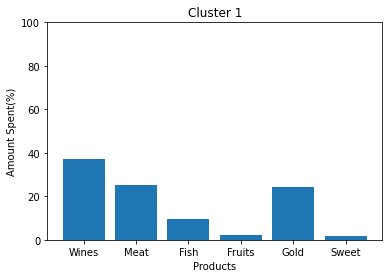

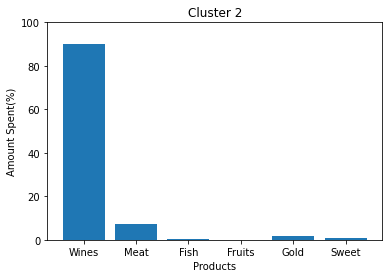

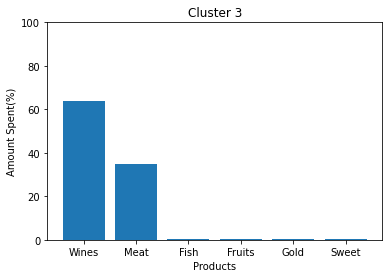

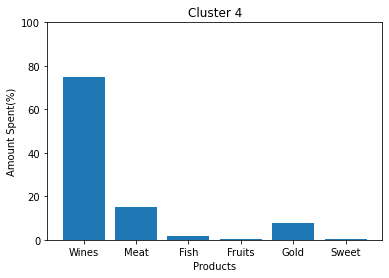

In [49]:
# Visualization of Product Pattern

xaxis = ['Wines', 'Meat', 'Fish', 'Fruits', 'Gold', 'Sweet']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for prod in xaxis:
        if prod in x['Maxpurchase'].unique(): 
            yaxis.append(x['Maxpurchase'].value_counts()[prod]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Products')
    plt.ylabel('Amount Spent(%)')
    plt.show()

In [50]:
# Patterns on number of purchases made through different sites

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxsite'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Store      328
Web        136
Catalog      4
Name: Maxsite, dtype: int64
for cluster 2
Store      439
Web        207
Catalog     16
Name: Maxsite, dtype: int64
for cluster 3
Store      364
Catalog    109
Web         71
Name: Maxsite, dtype: int64
for cluster 4
Store      342
Web        173
Catalog     27
Name: Maxsite, dtype: int64


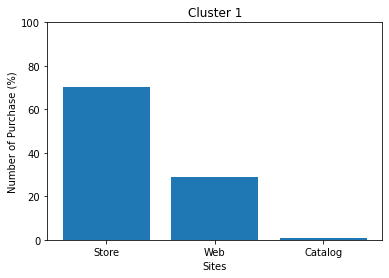

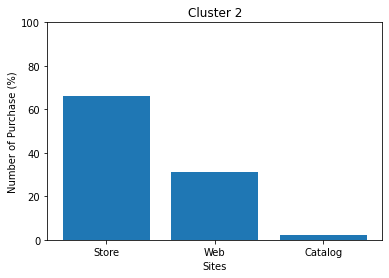

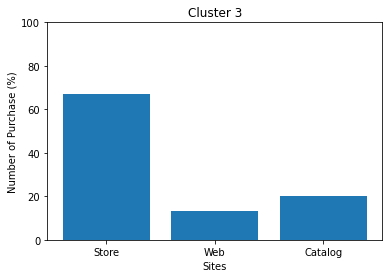

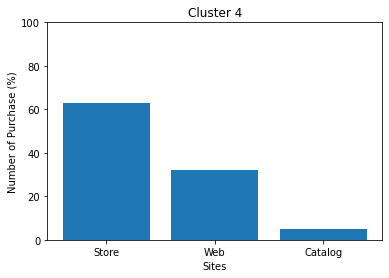

In [51]:
# Visualization of Site Purchase Pattern

xaxis = ['Store', 'Web', 'Catalog']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for site in xaxis:
        if site in x['Maxsite'].unique(): 
            yaxis.append(x['Maxsite'].value_counts()[site]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Sites')
    plt.ylabel('Number of Purchase (%)')
    plt.show()


In [52]:
# Patterns on Web Visits

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['NumWebVisitsMonth_after'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
high    286
mid     158
low      24
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 2
mid     313
high    272
low      77
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 3
low     407
mid     118
high     19
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 4
high    244
mid     242
low      56
Name: NumWebVisitsMonth_after, dtype: int64


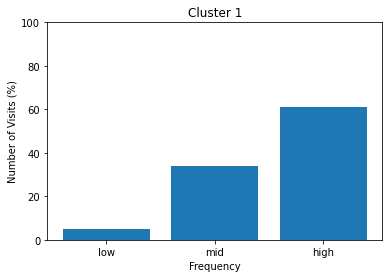

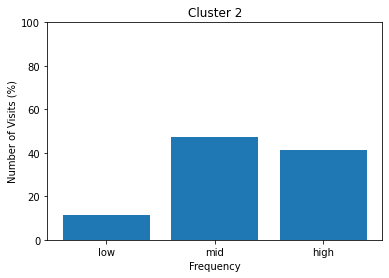

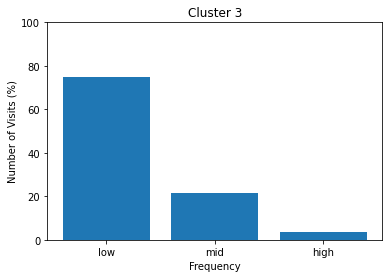

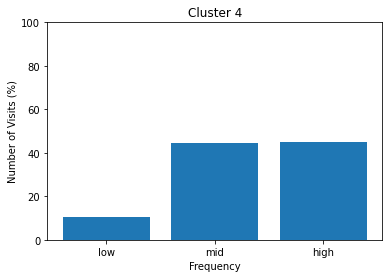

In [53]:
# Visualization of Web Visits Pattern

xaxis = ['low', 'mid', 'high']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for num in xaxis:
        if num in x['NumWebVisitsMonth_after'].unique(): 
            yaxis.append(x['NumWebVisitsMonth_after'].value_counts()[num]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Frequency')
    plt.ylabel('Number of Visits (%)')
    plt.show()
    

### Cluster Characteristics - Setting 2

<AxesSubplot:xlabel='Income_after', ylabel='Marital_Status_after'>

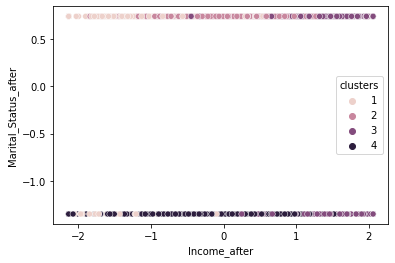

In [54]:
sns.scatterplot(x="Income_after", y="Marital_Status_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='age_after', ylabel='Income_after'>

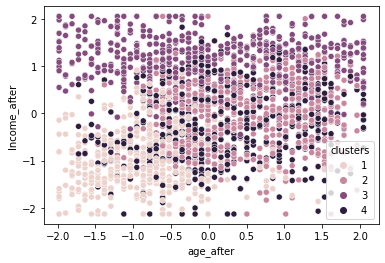

In [55]:
sns.scatterplot(x="age_after", y="Income_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='Education_after', ylabel='Income_after'>

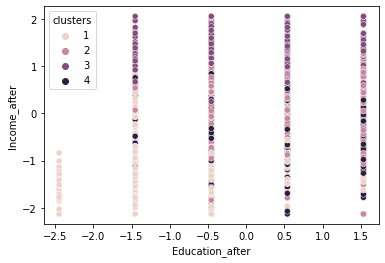

In [128]:
sns.scatterplot(x="Education_after", y="Income_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='children_after', ylabel='Income_after'>

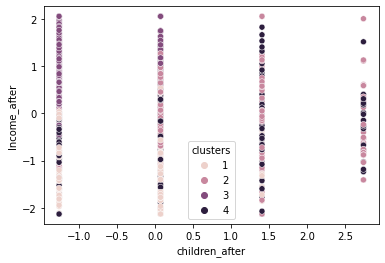

In [127]:
sns.scatterplot(x="children_after", y="Income_after", data=X_all, hue="clusters")

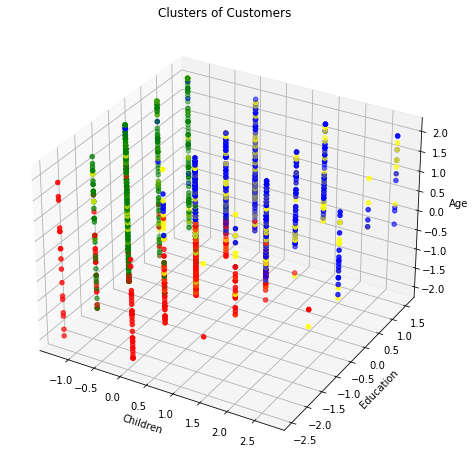

In [126]:
# Visulization of Clusters

import seaborn as sns

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = {1: 'red', 2: 'blue', 3: "green", 4: "yellow"}
ax.scatter(xs="children_after", ys="Education_after", zs="age_after", data=X_all, c=X_all['clusters'].map(colors))

ax.set_xlabel('Children')
ax.set_ylabel('Education')
ax.set_zlabel('Age')
ax.set_title('Clusters of Customers')

plt.show()

# red: 1
# blue: 2 
# green: 3
# yellow: 4

# Setting 2 Test without education

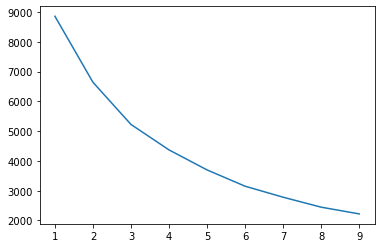

In [59]:
#using "ELBOW" method to find the best k for the three attributes clustering
k_data_list = [] # list for saving the data about K
ssd_data_list = [] # list for saving the data about SSD
features_all=['Income_after','Marital_Status_after', 'age_after','children_after']
X_all = Customer [features_all]
from sklearn.cluster import KMeans
for k in range(1,10):
    tmp_k_cluster_model = KMeans(n_clusters=k, random_state=42)
    # fit data
    tmp_k_cluster_model.fit(X_all)
    #Sum of squared distances of samples to their closest cluster center
    SSD = tmp_k_cluster_model.inertia_
    k_data_list.append(k)
    ssd_data_list.append(SSD)
# import the library for plotting figures
import matplotlib.pyplot as plt
# plot SSD and K
plt.plot(k_data_list,ssd_data_list)

In [60]:
# Build model using k = 3

from sklearn.cluster import KMeans
k=3
kmeansmodel = KMeans(n_clusters=k, random_state=42)

X_all = Customer[features_all]
kmeansmodel.fit(X_all)

clusters= kmeansmodel.predict(X_all)
X_all['clusters']=clusters+1

/var/folders/1t/rv1fb44x2799r0pq1z286md40000gn/T/ipykernel_68307/4031578395.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['clusters']=clusters+1


for cluster 1
Wines     641
Meat      149
Gold      103
Fish       37
Sweet      11
Fruits      7
Name: Maxpurchase, dtype: int64
for cluster 2
Wines     463
Meat      198
Fish        5
Gold        2
Fruits      2
Sweet       1
Name: Maxpurchase, dtype: int64
for cluster 3
Wines     417
Meat       91
Gold       62
Fish       17
Fruits      6
Sweet       4
Name: Maxpurchase, dtype: int64


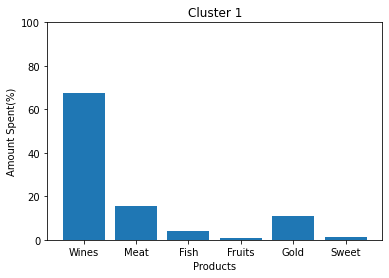

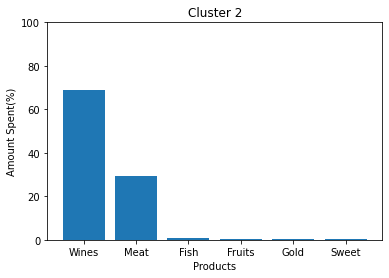

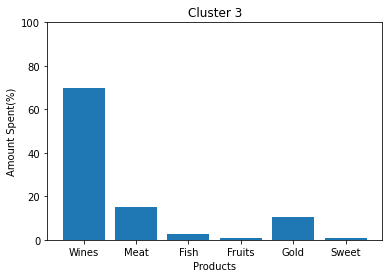

In [61]:
# Patterns of amount spent on products 

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxpurchase'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
Check

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

# Visualization of Product Pattern

xaxis = ['Wines', 'Meat', 'Fish', 'Fruits', 'Gold', 'Sweet']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for prod in xaxis:
        if prod in x['Maxpurchase'].unique(): 
            yaxis.append(x['Maxpurchase'].value_counts()[prod]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Products')
    plt.ylabel('Amount Spent(%)')
    plt.show()

for cluster 1
Store      650
Web        283
Catalog     15
Name: Maxsite, dtype: int64
for cluster 2
Store      441
Catalog    116
Web        114
Name: Maxsite, dtype: int64
for cluster 3
Store      382
Web        190
Catalog     25
Name: Maxsite, dtype: int64


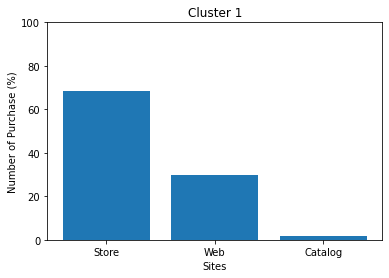

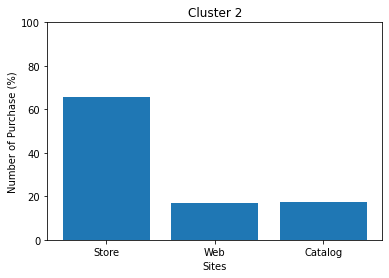

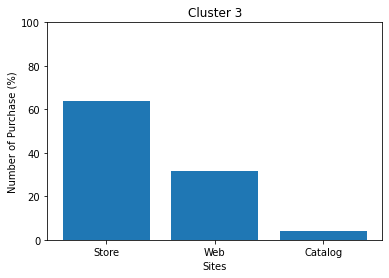

In [62]:
# Patterns on number of purchases made through different sites

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxsite'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1
    
# Visualization of Site Purchase Pattern

xaxis = ['Store', 'Web', 'Catalog']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for site in xaxis:
        if site in x['Maxsite'].unique(): 
            yaxis.append(x['Maxsite'].value_counts()[site]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Sites')
    plt.ylabel('Number of Purchase (%)')
    plt.show()
    

for cluster 1
high    501
mid     385
low      62
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 2
low     444
mid     184
high     43
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 3
high    277
mid     262
low      58
Name: NumWebVisitsMonth_after, dtype: int64


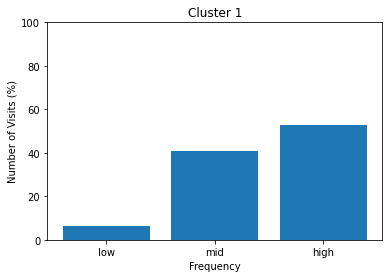

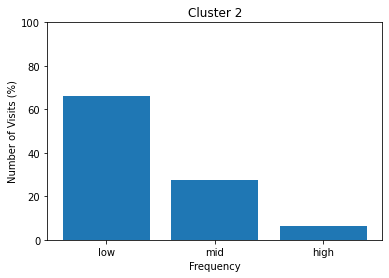

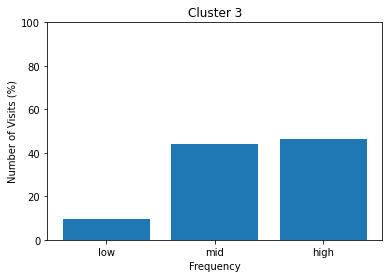

In [63]:
# Patterns on Web Visits

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['NumWebVisitsMonth_after'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1
    
# Visualization of Web Visits Pattern

xaxis = ['low', 'mid', 'high']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for num in xaxis:
        if num in x['NumWebVisitsMonth_after'].unique(): 
            yaxis.append(x['NumWebVisitsMonth_after'].value_counts()[num]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Frequency')
    plt.ylabel('Number of Visits (%)')
    plt.show()

<AxesSubplot:xlabel='Income_after', ylabel='age_after'>

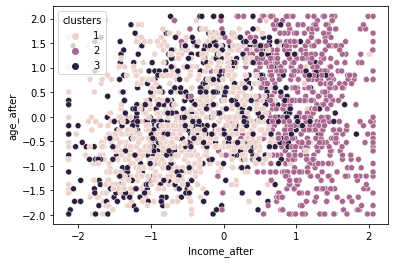

In [64]:
sns.scatterplot(x="Income_after", y="age_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='Income_after', ylabel='Marital_Status_after'>

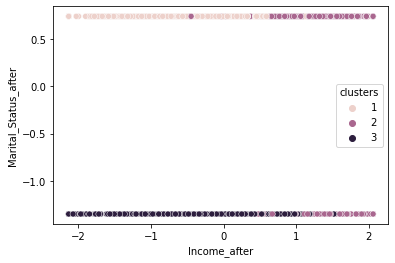

In [65]:
sns.scatterplot(x="Income_after", y="Marital_Status_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='age_after', ylabel='children_after'>

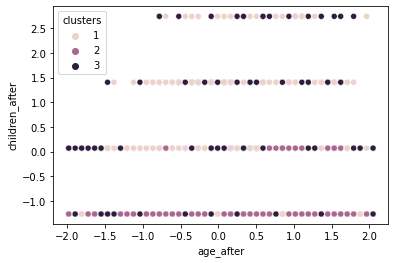

In [66]:
sns.scatterplot(x="age_after", y="children_after", data=X_all, hue="clusters")

## 3.4. Model Setting 3

K = 3

Features = income, age, education, marital_status

Tried to see the performance after dropping the feature children, since it has thes strongest negative correlation with income of -0.35. 

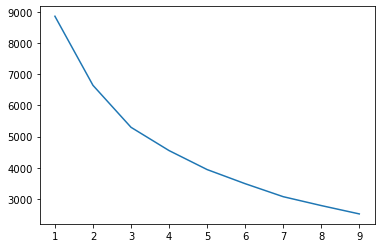

In [67]:
#using "ELBOW" method to find the best k for the three attributes clustering
k_data_list = [] # list for saving the data about K
ssd_data_list = [] # list for saving the data about SSD
features_all=['Income_after', 'Education_after','Marital_Status_after', 'age_after']
X_all = Customer [features_all]
from sklearn.cluster import KMeans
for k in range(1,10):
    tmp_k_cluster_model = KMeans(n_clusters=k, random_state=42)
    # fit data
    tmp_k_cluster_model.fit(X_all)
    #Sum of squared distances of samples to their closest cluster center
    SSD = tmp_k_cluster_model.inertia_
    k_data_list.append(k)
    ssd_data_list.append(SSD)
# import the library for plotting figures
import matplotlib.pyplot as plt
# plot SSD and K
plt.plot(k_data_list,ssd_data_list)

In [68]:
# Model building using k = 3


from sklearn.cluster import KMeans
k=3
kmeansmodel = KMeans(n_clusters=k, random_state=42)
features_all=['age_after','Income_after', 'Education_after', 'Marital_Status_after']
X_all = Customer[features_all]
kmeansmodel.fit(X_all)
clusters= kmeansmodel.predict(X_all)
X_all['clusters']=clusters+1

/var/folders/1t/rv1fb44x2799r0pq1z286md40000gn/T/ipykernel_68307/930694230.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['clusters']=clusters+1


### Model Evaluation - Setting 3

In [69]:
# SSD
SSD = kmeansmodel.inertia_
print(f'SSD: {SSD}.')

SSD: 5298.588790959424.


for cluster 1
Wines     515
Meat      151
Gold       31
Fish       10
Fruits      3
Sweet       3
Name: Maxpurchase, dtype: int64
for cluster 2
Wines     758
Meat      140
Gold        9
Fish        4
Sweet       4
Fruits      2
Name: Maxpurchase, dtype: int64
for cluster 3
Wines     248
Meat      147
Gold      127
Fish       45
Fruits     10
Sweet       9
Name: Maxpurchase, dtype: int64


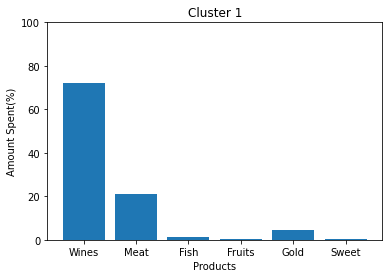

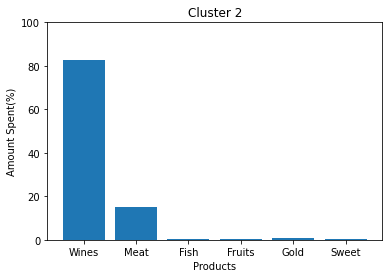

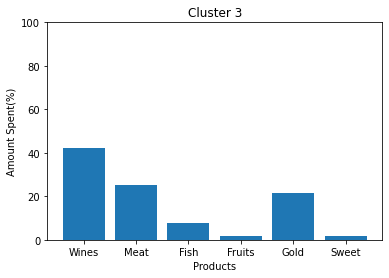

In [70]:
# Patterns of amount spent on products 

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxpurchase'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
Check

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

# Visualization of Product Pattern

xaxis = ['Wines', 'Meat', 'Fish', 'Fruits', 'Gold', 'Sweet']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for prod in xaxis:
        if prod in x['Maxpurchase'].unique(): 
            yaxis.append(x['Maxpurchase'].value_counts()[prod]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Products')
    plt.ylabel('Amount Spent(%)')
    plt.show()

for cluster 1
Store      454
Web        195
Catalog     64
Name: Maxsite, dtype: int64
for cluster 2
Store      604
Web        233
Catalog     80
Name: Maxsite, dtype: int64
for cluster 3
Store      415
Web        159
Catalog     12
Name: Maxsite, dtype: int64


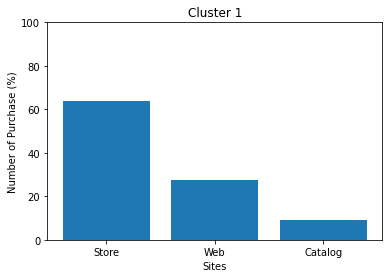

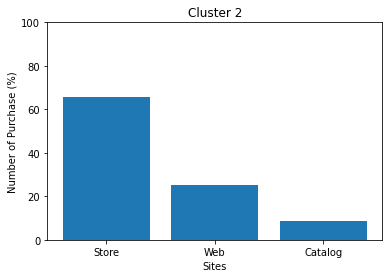

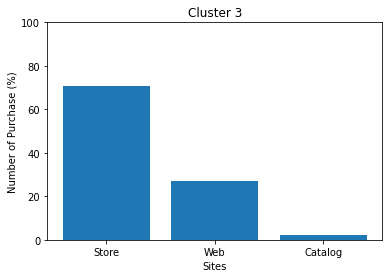

In [71]:
# Patterns on number of purchases made through different sites

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxsite'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1
    
# Visualization of Site Purchase Pattern

xaxis = ['Store', 'Web', 'Catalog']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for site in xaxis:
        if site in x['Maxsite'].unique(): 
            yaxis.append(x['Maxsite'].value_counts()[site]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Sites')
    plt.ylabel('Number of Purchase (%)')
    plt.show()
    

for cluster 1
mid     268
high    241
low     204
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 2
mid     364
low     325
high    228
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 3
high    352
mid     199
low      35
Name: NumWebVisitsMonth_after, dtype: int64


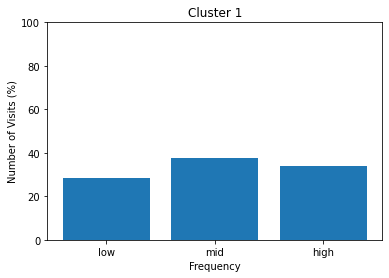

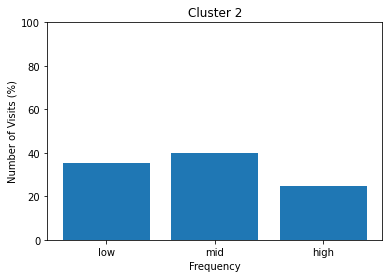

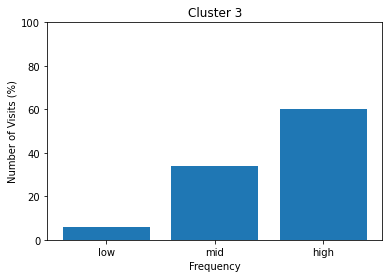

In [72]:
# Patterns on Web Visits

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['NumWebVisitsMonth_after'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1
    
# Visualization of Web Visits Pattern

xaxis = ['low', 'mid', 'high']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for num in xaxis:
        if num in x['NumWebVisitsMonth_after'].unique(): 
            yaxis.append(x['NumWebVisitsMonth_after'].value_counts()[num]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Frequency')
    plt.ylabel('Number of Visits (%)')
    plt.show()

### Model Characteristics - Setting 3

<AxesSubplot:xlabel='Income_after', ylabel='age_after'>

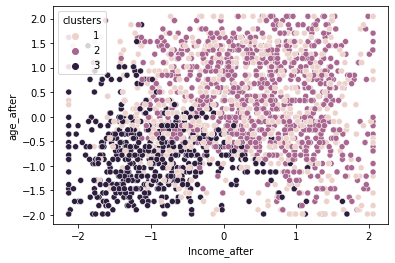

In [73]:
sns.scatterplot(x="Income_after", y="age_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='Marital_Status_after', ylabel='age_after'>

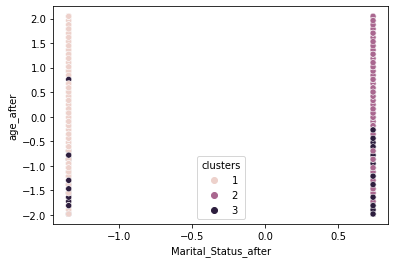

In [74]:
sns.scatterplot(x="Marital_Status_after", y="age_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='Education_after', ylabel='Income_after'>

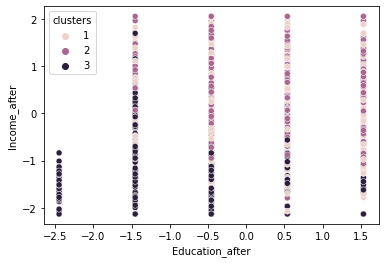

In [75]:
sns.scatterplot(x="Education_after", y="Income_after", data=X_all, hue="clusters")

## 3.4. Model Setting 4

K = 4

Features = children, age, Income

Trying to cluster using three attributes children, age and Income to find what the customers like to buy most

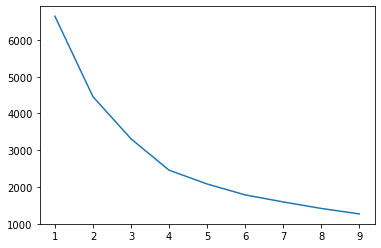

In [76]:
#using "ELBOW" method to find the best k for the three attributes clustering
k_data_list = [] # list for saving the data about K
ssd_data_list = [] # list for saving the data about SSD
features_all=['children_after','age_after','Income_after']
X_all = Customer [features_all]
from sklearn.cluster import KMeans
for k in range(1,10):
    tmp_k_cluster_model = KMeans(n_clusters=k, random_state=42)
    # fit data
    tmp_k_cluster_model.fit(X_all)
    #Sum of squared distances of samples to their closest cluster center
    SSD = tmp_k_cluster_model.inertia_
    k_data_list.append(k)
    ssd_data_list.append(SSD)
# import the library for plotting figures
import matplotlib.pyplot as plt
# plot SSD and K
plt.plot(k_data_list,ssd_data_list)

based on the graph above, k=4 will be a good choice

In [77]:
# Model building using k = 4

from sklearn.cluster import KMeans
k=4
kmeansmodel = KMeans(n_clusters=k, random_state=42)
features_all=['children_after','age_after','Income_after']
X_all = Customer[features_all]
kmeansmodel.fit(X_all)
clusters= kmeansmodel.predict(X_all)
X_all['clusters']=clusters+1

/var/folders/1t/rv1fb44x2799r0pq1z286md40000gn/T/ipykernel_68307/3942785380.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['clusters']=clusters+1


### Model Evaluation - Setting 4

In [78]:
# SSD
SSD = kmeansmodel.inertia_
print(f'SSD: {SSD}.')

SSD: 2458.5666573928975.


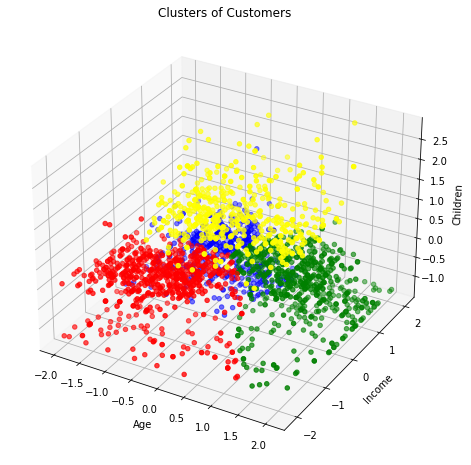

In [79]:
# Visulization of Clusters

import seaborn as sns

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = {1: 'red', 2: 'blue', 3: "green", 4: "yellow"}
ax.scatter(xs="age_after", ys="Income_after", zs="children_after", data=X_all, c=X_all['clusters'].map(colors))

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Children')
ax.set_title('Clusters of Customers')

plt.show()

# red: 1
# blue: 2 
# green: 3
# yello: 4

In [80]:
# Patterns of amount spent on products 

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxpurchase'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
Check

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Wines     299
Meat      158
Gold      126
Fish       50
Fruits     13
Sweet      11
Name: Maxpurchase, dtype: int64
for cluster 2
Wines    345
Meat     123
Fish       2
Gold       1
Name: Maxpurchase, dtype: int64
for cluster 3
Wines     501
Meat      103
Gold       14
Fish        5
Sweet       4
Fruits      2
Name: Maxpurchase, dtype: int64
for cluster 4
Wines    376
Meat      54
Gold      26
Fish       2
Sweet      1
Name: Maxpurchase, dtype: int64


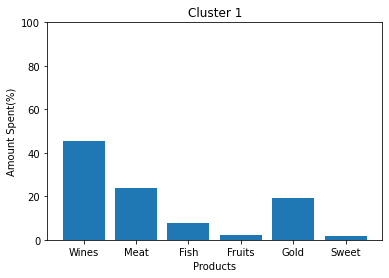

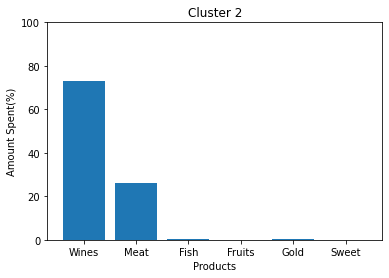

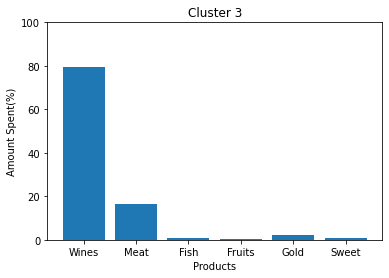

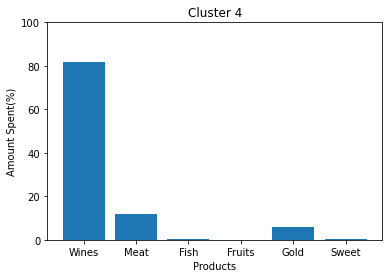

In [81]:
# Visualization of Product Pattern

xaxis = ['Wines', 'Meat', 'Fish', 'Fruits', 'Gold', 'Sweet']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for prod in xaxis:
        if prod in x['Maxpurchase'].unique(): 
            yaxis.append(x['Maxpurchase'].value_counts()[prod]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Products')
    plt.ylabel('Amount Spent(%)')
    plt.show()

In [82]:
# Patterns on number of purchases made through different sites

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxsite'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Store      449
Web        202
Catalog      6
Name: Maxsite, dtype: int64
for cluster 2
Store      327
Web         81
Catalog     63
Name: Maxsite, dtype: int64
for cluster 3
Store      383
Web        166
Catalog     80
Name: Maxsite, dtype: int64
for cluster 4
Store      314
Web        138
Catalog      7
Name: Maxsite, dtype: int64


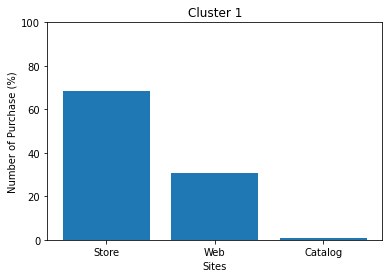

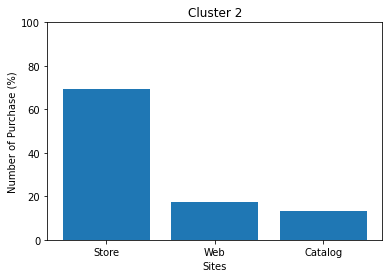

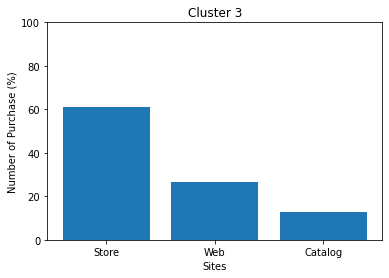

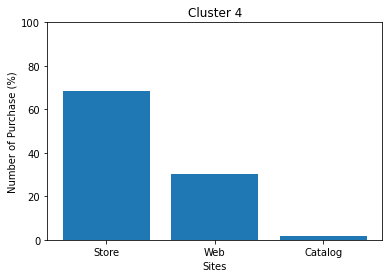

In [83]:
# Visualization of Site Purchase Pattern

xaxis = ['Store', 'Web', 'Catalog']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for site in xaxis:
        if site in x['Maxsite'].unique(): 
            yaxis.append(x['Maxsite'].value_counts()[site]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Sites')
    plt.ylabel('Number of Purchase (%)')
    plt.show()
    

In [84]:
# Patterns on Web Visits

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['NumWebVisitsMonth_after'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
high    416
mid     213
low      28
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 2
low     264
mid     173
high     34
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 3
low     250
mid     244
high    135
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 4
high    236
mid     201
low      22
Name: NumWebVisitsMonth_after, dtype: int64


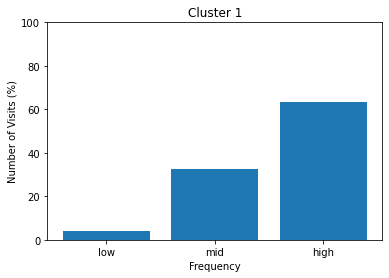

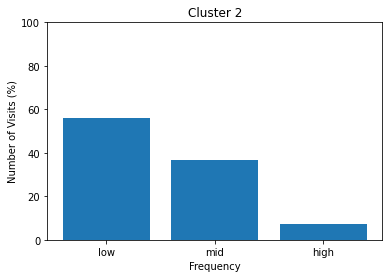

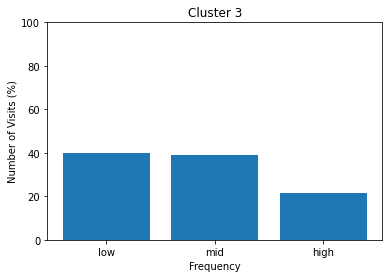

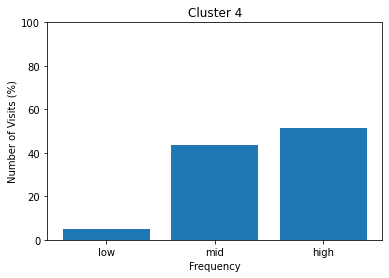

In [85]:
# Visualization of Web Visits Pattern

xaxis = ['low', 'mid', 'high']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for num in xaxis:
        if num in x['NumWebVisitsMonth_after'].unique(): 
            yaxis.append(x['NumWebVisitsMonth_after'].value_counts()[num]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Frequency')
    plt.ylabel('Number of Visits (%)')
    plt.show()
    

### Clusters Characteristics - Model Setting 4

<AxesSubplot:xlabel='age_after', ylabel='children_after'>

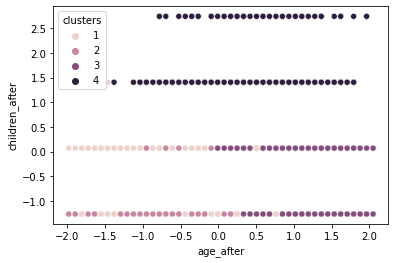

In [86]:
# Detailed Visualization of clusters attributes 

sns.scatterplot(x="age_after", y="children_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='age_after', ylabel='Income_after'>

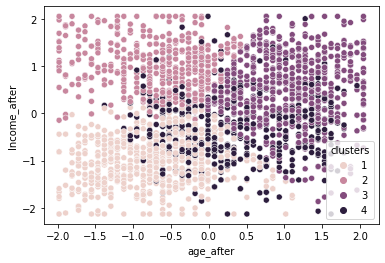

In [87]:
sns.scatterplot(x="age_after", y="Income_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='children_after', ylabel='Income_after'>

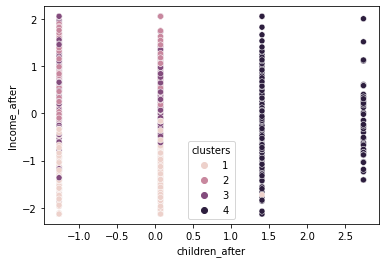

In [88]:
sns.scatterplot(x="children_after", y="Income_after", data=X_all, hue="clusters")

## 3.5. Model Setting 5

k = 4

features = Marital_Status, Age, Children

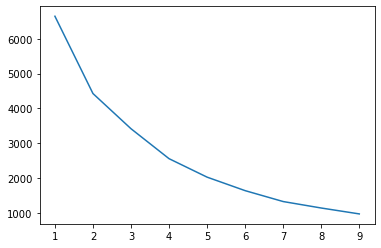

In [89]:
#using "ELBOW" method to find the best k for the three attributes clustering
k_data_list = [] # list for saving the data about K
ssd_data_list = [] # list for saving the data about SSD
features_all=['Marital_Status_after','age_after','children_after']
X_all = Customer [features_all]
from sklearn.cluster import KMeans
for k in range(1,10):
    tmp_k_cluster_model = KMeans(n_clusters=k, random_state=42)
    # fit data
    tmp_k_cluster_model.fit(X_all)
    #Sum of squared distances of samples to their closest cluster center
    SSD = tmp_k_cluster_model.inertia_
    k_data_list.append(k)
    ssd_data_list.append(SSD)
# import the library for plotting figures
import matplotlib.pyplot as plt
# plot SSD and K
plt.plot(k_data_list,ssd_data_list)

In [90]:
# Model Building using k = 4

k=4
kmeansmodel = KMeans(n_clusters=k, random_state=42)
features_all=['Marital_Status_after','age_after','children_after']
X_all = Customer[features_all]
kmeansmodel.fit(X_all)
clusters= kmeansmodel.predict(X_all)
X_all['clusters']=clusters+1

/var/folders/1t/rv1fb44x2799r0pq1z286md40000gn/T/ipykernel_68307/3077436201.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['clusters']=clusters+1


### Model Evaluation - Setting 5

In [91]:
# SSD
SSD = kmeansmodel.inertia_
print(f'SSD: {SSD}.')

SSD: 2556.2193091889976.


In [92]:
# Patterns of amount spent on products 

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxpurchase'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Wines     319
Meat       75
Gold       14
Fish        9
Sweet       4
Fruits      3
Name: Maxpurchase, dtype: int64
for cluster 2
Wines     378
Meat       54
Gold       28
Fish        2
Sweet       1
Fruits      1
Name: Maxpurchase, dtype: int64
for cluster 3
Wines     421
Meat      161
Gold       76
Fish       30
Fruits      6
Sweet       6
Name: Maxpurchase, dtype: int64
for cluster 4
Wines     403
Meat      148
Gold       49
Fish       18
Fruits      5
Sweet       5
Name: Maxpurchase, dtype: int64


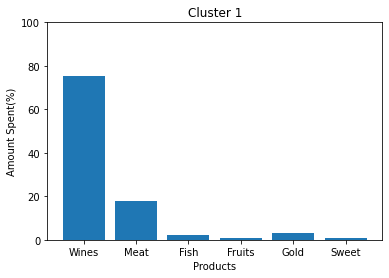

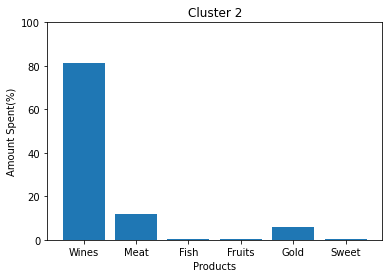

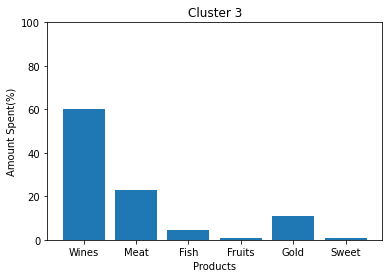

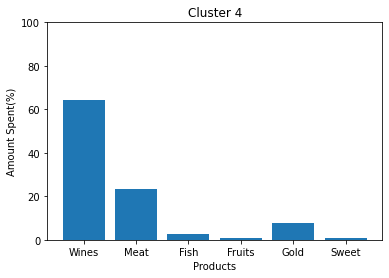

In [93]:
# Visualization of Product Pattern

xaxis = ['Wines', 'Meat', 'Fish', 'Fruits', 'Gold', 'Sweet']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for prod in xaxis:
        if prod in x['Maxpurchase'].unique(): 
            yaxis.append(x['Maxpurchase'].value_counts()[prod]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Products')
    plt.ylabel('Amount Spent(%)')
    plt.show()

In [94]:
# Patterns on number of purchases made through different sites

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxsite'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Store      274
Web        104
Catalog     46
Name: Maxsite, dtype: int64
for cluster 2
Store      318
Web        139
Catalog      7
Name: Maxsite, dtype: int64
for cluster 3
Store      479
Web        181
Catalog     40
Name: Maxsite, dtype: int64
for cluster 4
Store      402
Web        163
Catalog     63
Name: Maxsite, dtype: int64


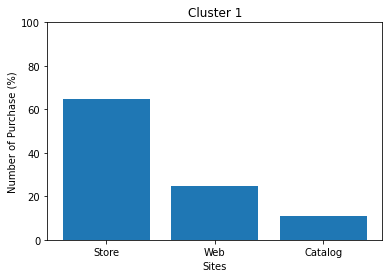

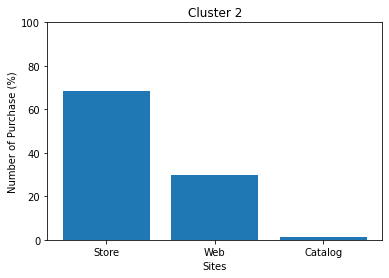

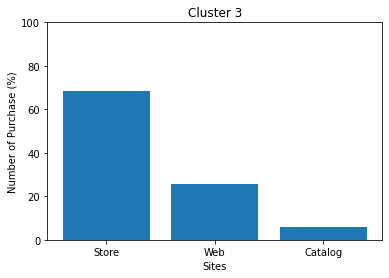

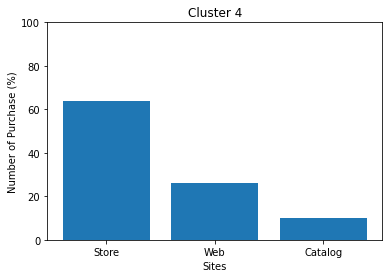

In [95]:
# Visualization of Site Purchase Pattern

xaxis = ['Store', 'Web', 'Catalog']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for site in xaxis:
        if site in x['Maxsite'].unique(): 
            yaxis.append(x['Maxsite'].value_counts()[site]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Sites')
    plt.ylabel('Number of Purchase (%)')
    plt.show()
    

In [96]:
# Patterns on Web Visits

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['NumWebVisitsMonth_after'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
low     174
mid     168
high     82
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 2
high    237
mid     203
low      24
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 3
high    293
mid     240
low     167
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 4
mid     220
high    209
low     199
Name: NumWebVisitsMonth_after, dtype: int64


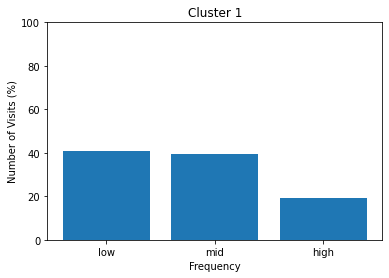

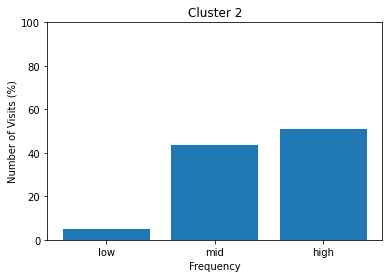

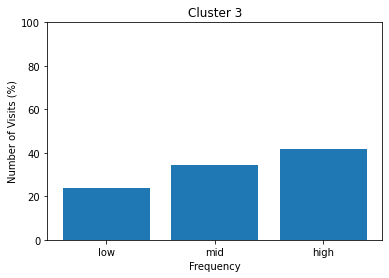

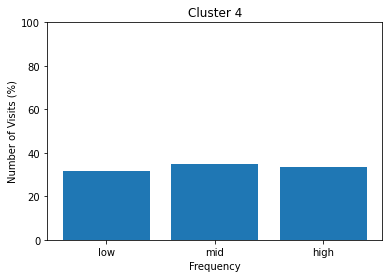

In [97]:
# Visualization of Web Visits Pattern

xaxis = ['low', 'mid', 'high']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for num in xaxis:
        if num in x['NumWebVisitsMonth_after'].unique(): 
            yaxis.append(x['NumWebVisitsMonth_after'].value_counts()[num]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Frequency')
    plt.ylabel('Number of Visits (%)')
    plt.show()
    

### Cluster Characteristics - Setting 5

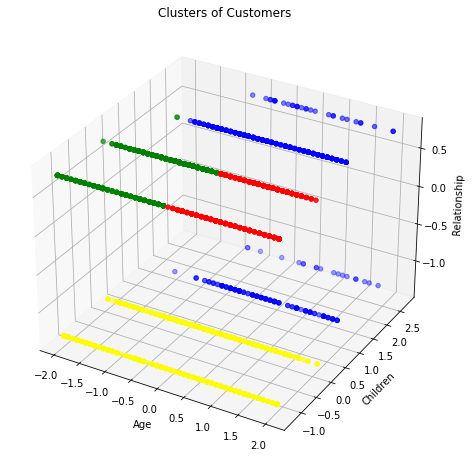

In [98]:
# Visulization of Clusters

import seaborn as sns

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = {1: 'red', 2: 'blue', 3: "green", 4: "yellow"}
ax.scatter(xs="age_after", ys="children_after", zs="Marital_Status_after", data=X_all, c=X_all['clusters'].map(colors))

ax.set_xlabel('Age')
ax.set_ylabel('Children')
ax.set_zlabel('Relationship')
ax.set_title('Clusters of Customers')

plt.show()

# red: 1
# blue: 2 
# green: 3
# yello: 4

<AxesSubplot:xlabel='age_after', ylabel='Marital_Status_after'>

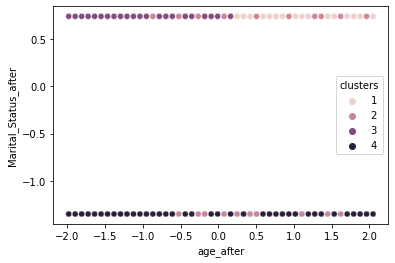

In [99]:
sns.scatterplot(x="age_after", y="Marital_Status_after", data=X_all, hue="clusters")

<AxesSubplot:xlabel='children_after', ylabel='age_after'>

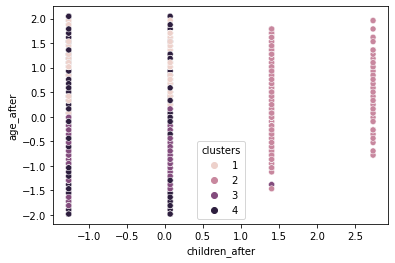

In [100]:
sns.scatterplot(x="children_after", y="age_after", data=X_all, hue="clusters")

## 3.6. Model Setting 6

K = 2

Features = children, Income

Trying to cluster using two attributes children and Income to find what the customers like to buy most

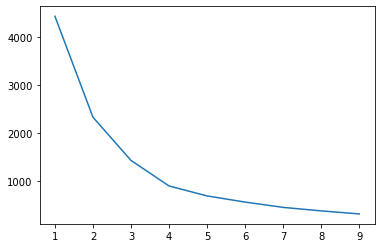

In [101]:
#using "ELBOW" method to find the best k for the 2 attributes clustering
k_data_list = [] # list for saving the data about K
ssd_data_list = [] # list for saving the data about SSD
features_all=['children_after','Income_after']
X_all = Customer [features_all]
from sklearn.cluster import KMeans
for k in range(1,10):
    tmp_k_cluster_model = KMeans(n_clusters=k, random_state=42)
    # fit data
    tmp_k_cluster_model.fit(X_all)
    #Sum of squared distances of samples to their closest cluster center
    SSD = tmp_k_cluster_model.inertia_
    k_data_list.append(k)
    ssd_data_list.append(SSD)
# import the library for plotting figures
import matplotlib.pyplot as plt
# plot SSD and K
plt.plot(k_data_list,ssd_data_list)

based on the graph above, k=4 will be a good choice

In [102]:
# Model building using k = 4

from sklearn.cluster import KMeans
k=4
kmeansmodel = KMeans(n_clusters=k, random_state=42)
features_all=['children_after','Income_after']
X_all = Customer [features_all]
kmeansmodel.fit(X_all)
clusters= kmeansmodel.predict(X_all)
X_all['clusters']=clusters+1

/var/folders/1t/rv1fb44x2799r0pq1z286md40000gn/T/ipykernel_68307/1699728849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['clusters']=clusters+1


### Model Evaluation - Setting 6

In [103]:
# SSD
SSD = kmeansmodel.inertia_
print(f'SSD: {SSD}.')

SSD: 895.2594344791396.


<AxesSubplot:xlabel='children_after', ylabel='Income_after'>

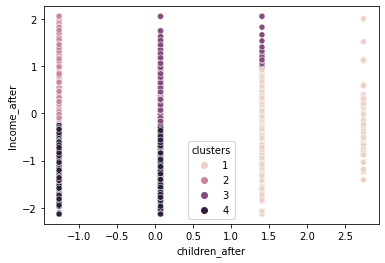

In [104]:
#show some of the graph
import seaborn as sns
sns.scatterplot(x="children_after", y="Income_after", data=X_all, hue="clusters")

In [105]:
# Patterns of amount spent on products 

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxpurchase'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Wines     363
Meat       53
Gold       28
Fish        2
Sweet       1
Fruits      1
Name: Maxpurchase, dtype: int64
for cluster 2
Wines    313
Meat     180
Gold       2
Fish       2
Sweet      1
Name: Maxpurchase, dtype: int64
for cluster 3
Wines    547
Meat      45
Gold       7
Fish       3
Sweet      2
Name: Maxpurchase, dtype: int64
for cluster 4
Wines     298
Meat      160
Gold      130
Fish       52
Fruits     14
Sweet      12
Name: Maxpurchase, dtype: int64


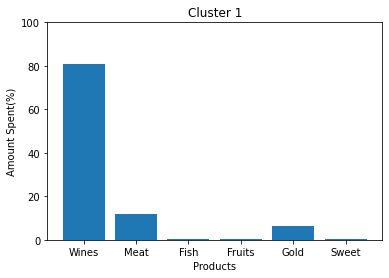

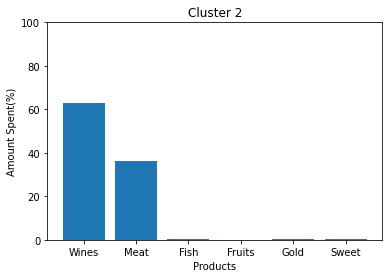

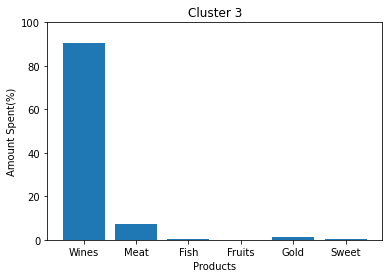

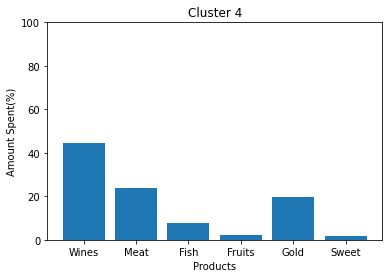

In [106]:
# Visualization of Product Pattern

xaxis = ['Wines', 'Meat', 'Fish', 'Fruits', 'Gold', 'Sweet']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for prod in xaxis:
        if prod in x['Maxpurchase'].unique(): 
            yaxis.append(x['Maxpurchase'].value_counts()[prod]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Products')
    plt.ylabel('Amount Spent(%)')
    plt.show()

In [107]:
# Patterns on number of purchases made through different sites

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxsite'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Store      310
Web        131
Catalog      7
Name: Maxsite, dtype: int64
for cluster 2
Store      332
Catalog    109
Web         57
Name: Maxsite, dtype: int64
for cluster 3
Store      373
Web        201
Catalog     30
Name: Maxsite, dtype: int64
for cluster 4
Store      458
Web        198
Catalog     10
Name: Maxsite, dtype: int64


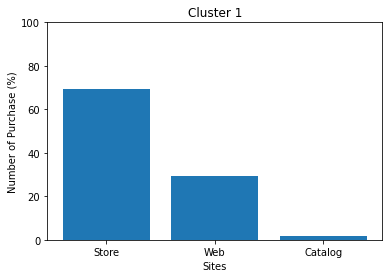

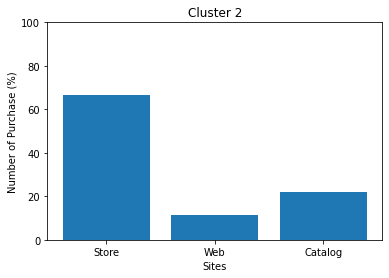

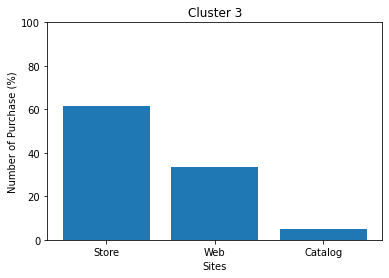

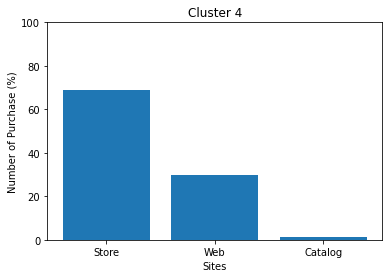

In [108]:
# Visualization of Site Purchase Pattern

xaxis = ['Store', 'Web', 'Catalog']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for site in xaxis:
        if site in x['Maxsite'].unique(): 
            yaxis.append(x['Maxsite'].value_counts()[site]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Sites')
    plt.ylabel('Number of Purchase (%)')
    plt.show()

In [109]:
# Patterns on Web Visits

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['NumWebVisitsMonth_after'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
high    234
mid     192
low      22
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 2
low     384
mid      94
high     20
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 3
mid     331
high    143
low     130
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 4
high    424
mid     214
low      28
Name: NumWebVisitsMonth_after, dtype: int64


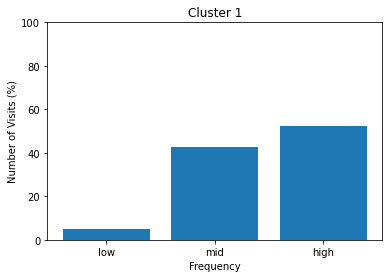

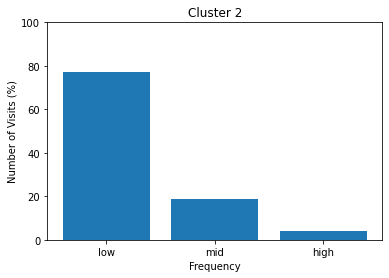

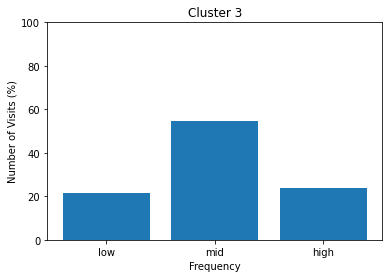

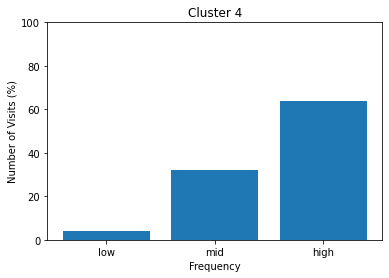

In [110]:
# Visualization of Web Visits Pattern

xaxis = ['low', 'mid', 'high']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for num in xaxis:
        if num in x['NumWebVisitsMonth_after'].unique(): 
            yaxis.append(x['NumWebVisitsMonth_after'].value_counts()[num]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Frequency')
    plt.ylabel('Number of Visits (%)')
    plt.show()

## 3.7. Model Setting 7

Trying to cluster using two attributes age and Income to find what the customers like to buy most

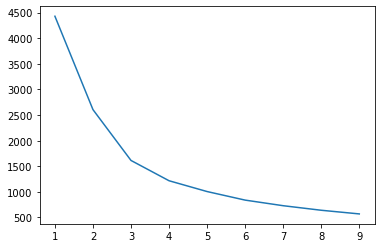

In [111]:
#using "ELBOW" method to find the best k for the 2 attributes clustering
k_data_list = [] # list for saving the data about K
ssd_data_list = [] # list for saving the data about SSD
features_all=['age_after','Income_after']
X_all = Customer[features_all]
from sklearn.cluster import KMeans
for k in range(1,10):
    tmp_k_cluster_model = KMeans(n_clusters=k, random_state=42)
    # fit data
    tmp_k_cluster_model.fit(X_all)
    #Sum of squared distances of samples to their closest cluster center
    SSD = tmp_k_cluster_model.inertia_
    k_data_list.append(k)
    ssd_data_list.append(SSD)
# import the library for plotting figures
import matplotlib.pyplot as plt
# plot SSD and K
plt.plot(k_data_list,ssd_data_list)

based on the graph above, k=3 will be a good choice

In [112]:
# Model Building
from sklearn.cluster import KMeans
k=3
kmeansmodel = KMeans(n_clusters=k, random_state=42)
features_all=['age_after','Income_after']
X_all = Customer [features_all]
kmeansmodel.fit(X_all)
clusters= kmeansmodel.predict(X_all)
X_all['clusters']=clusters+1

/var/folders/1t/rv1fb44x2799r0pq1z286md40000gn/T/ipykernel_68307/973285397.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['clusters']=clusters+1


### Model Evaluation - Setting 7

In [113]:
# SSD
SSD = kmeansmodel.inertia_
print(f'SSD: {SSD}.')

SSD: 1613.9188184764434.


<AxesSubplot:xlabel='age_after', ylabel='Income_after'>

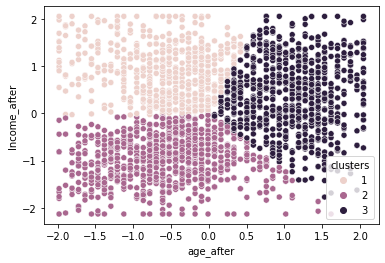

In [114]:
#show some of the graph
import seaborn as sns
sns.scatterplot(x="age_after", y="Income_after", data=X_all, hue="clusters")

In [115]:
# Patterns of amount spent on products

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxpurchase'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Wines    447
Meat     134
Gold       2
Fish       2
Name: Maxpurchase, dtype: int64
for cluster 2
Wines     434
Meat      193
Gold      152
Fish       52
Fruits     13
Sweet      12
Name: Maxpurchase, dtype: int64
for cluster 3
Wines     640
Meat      111
Gold       13
Fish        5
Sweet       4
Fruits      2
Name: Maxpurchase, dtype: int64


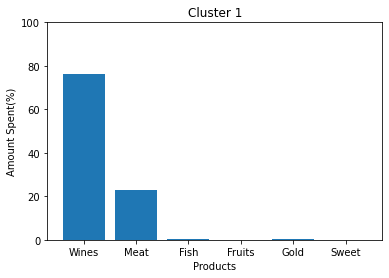

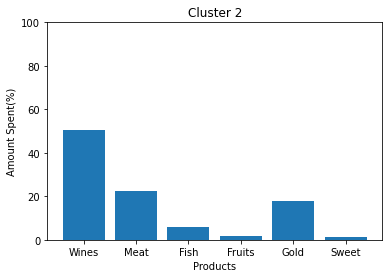

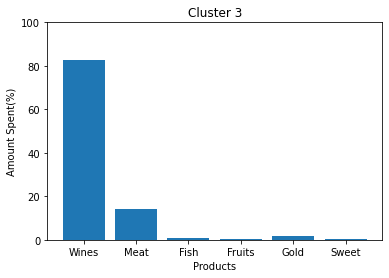

In [116]:
# Visualization of Product Pattern

xaxis = ['Wines', 'Meat', 'Fish', 'Fruits', 'Gold', 'Sweet']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for prod in xaxis:
        if prod in x['Maxpurchase'].unique(): 
            yaxis.append(x['Maxpurchase'].value_counts()[prod]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Products')
    plt.ylabel('Amount Spent(%)')
    plt.show()

In [117]:
# Patterns on number of purchases made through different sites

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['Maxsite'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)

i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
Store      390
Web        128
Catalog     67
Name: Maxsite, dtype: int64
for cluster 2
Store      597
Web        247
Catalog     12
Name: Maxsite, dtype: int64
for cluster 3
Store      486
Web        212
Catalog     77
Name: Maxsite, dtype: int64


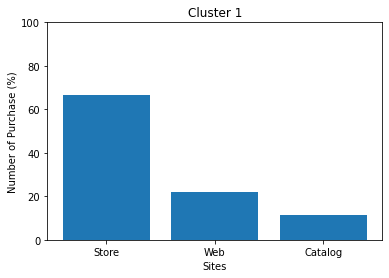

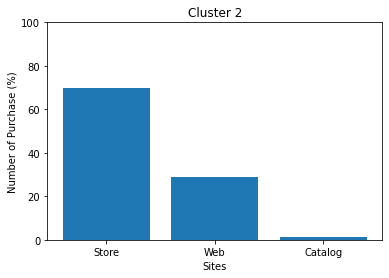

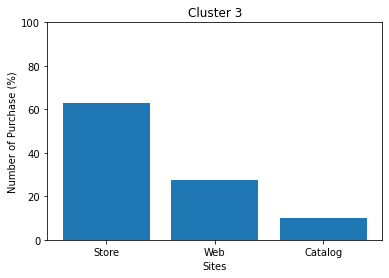

In [118]:
# Visualization of Site Purchase Pattern

xaxis = ['Store', 'Web', 'Catalog']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for site in xaxis:
        if site in x['Maxsite'].unique(): 
            yaxis.append(x['Maxsite'].value_counts()[site]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Sites')
    plt.ylabel('Number of Purchase (%)')
    plt.show()
    

In [119]:
# Patterns on Web Visits

# assign the predicted cluster to the initial dataframe
Check=pd.DataFrame(Customer['NumWebVisitsMonth_after'])
Check['cluster']=clusters
Check['ID']=Customer['ID']
Check.set_index('cluster',inplace=True)
i=0
while i<k:
    x=Check.loc[i]
    dict_count=x[x.columns[0]].value_counts()
    print("for cluster",i+1)
    print(dict_count)
    i+=1

for cluster 1
low     283
mid     219
high     83
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 2
high    536
mid     288
low      32
Name: NumWebVisitsMonth_after, dtype: int64
for cluster 3
mid     324
low     249
high    202
Name: NumWebVisitsMonth_after, dtype: int64


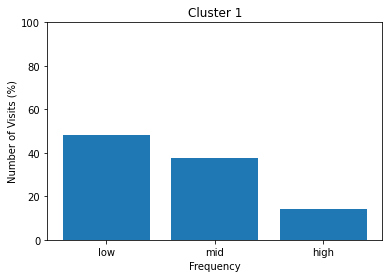

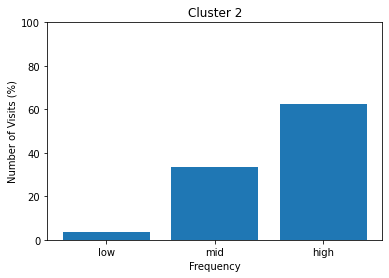

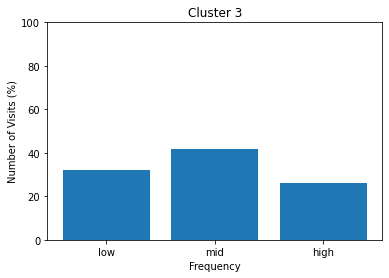

In [120]:
# Visualization of Web Visits Pattern

xaxis = ['low', 'mid', 'high']

for i in range(k):
    yaxis = []
    x = Check.loc[i]

    for num in xaxis:
        if num in x['NumWebVisitsMonth_after'].unique(): 
            yaxis.append(x['NumWebVisitsMonth_after'].value_counts()[num]/len(x)*100)
        else:
            yaxis.append(0)
            
    plt.bar(xaxis, yaxis)
    plt.ylim(0, 100)
    
    plt.title(f"Cluster {i+1}")
    plt.xlabel('Frequency')
    plt.ylabel('Number of Visits (%)')
    plt.show()

## 3.8. Model Setting 8 - Mean-Shift Clustering Algorithm

Try using another algorithm to do clustering to see if it can generates better result. We choose this model because it doesn't need to specify the number of clusters.

In [121]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

from mpl_toolkits.mplot3d import Axes3D

features_all=['Income_after','Marital_Status_after', 'age_after','children_after']
X_all = Customer[features_all]

estimate_bandwidth(X_all)

2.229717409918919

In [122]:
ms = MeanShift(bandwidth = 2.229717409918919)
ms.fit(X_all)

cluster_centers = ms.cluster_centers_

clusters = ms.labels_

cluster_label = np.unique(clusters)
print(f'Number of clusters:{len(cluster_label)}')

Number of clusters:1


Notes: The reason why this model doesn't work well is because it requires the data points to be more clearly seperated. This is difficult to achieve with data of customer characteristics as they are usually diversely distributed. 